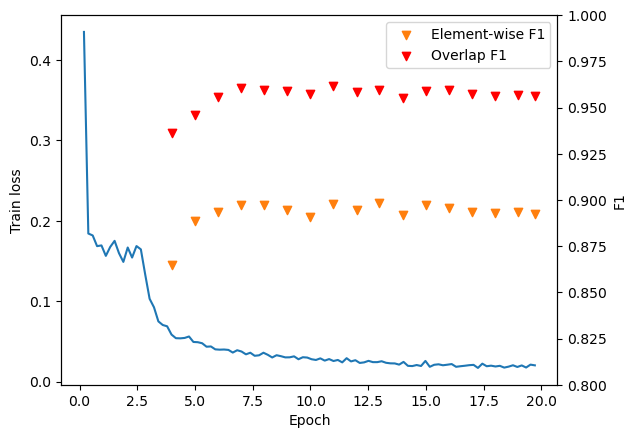

,elementwisef1,overlapf1,elementwiseprecision,overlapprecision,elementwiserecall,overlaprecall,step,epoch
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52,0.985782
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105,1.990521
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,158,2.995261
3,0.865003,0.936237,0.921442,0.920801,0.825631,0.965517,211,4.000000
4,0.888341,0.946146,0.879333,0.923069,0.906954,0.980750,263,4.985782
5,0.893471,0.955546,0.912227,0.942203,0.883854,0.976697,316,5.990521
6,0.896984,0.960807,0.911358,0.948184,0.891165,0.980750,369,6.995261
7,0.897224,0.959536,0.904588,0.945871,0.898110,0.980730,422,8.000000
8,0.894635,0.958897,0.911692,0.948569,0.886626,0.976697,474,8.985782
9,0.890905,0.957423,0.924685,0.954692,0.867703,0.967579,527,9.990521


In [35]:
import pandas as pd
from pathlib import Path
import json


paths = Path("model_filledPause_3e-5_20_4/").glob("checkpoint-*stats.jsonl")
data = []

for f in paths:
    df = pd.read_json(f, lines=True).dropna()
    data.append(
        {
            "elementwisef1": (
                df["f1-score_elementwise"]
                * df.support_elementwise
                / df.support_elementwise.sum()
            ).sum(),
            "overlapf1": (
                df["f1-score_overlap"] * df.support_overlap / df.support_overlap.sum()
            ).sum(),
            "elementwiseprecision": (
                df["precision_elementwise"]
                * df.support_elementwise
                / df.support_elementwise.sum()
            ).sum(),
            "overlapprecision": (
                df["precision_overlap"] * df.support_overlap / df.support_overlap.sum()
            ).sum(),
            "elementwiserecall": (
                df["recall_elementwise"]
                * df.support_elementwise
                / df.support_elementwise.sum()
            ).sum(),
            "overlaprecall": (
                df["recall_overlap"] * df.support_overlap / df.support_overlap.sum()
            ).sum(),
            "step": int(f.name.split("checkpoint-")[-1].split("_stats")[0]),
        }
    )
metricsdf = pd.DataFrame(data=data).sort_values("step").reset_index(drop=True)


latest = Path("model_filledPause_3e-5_20_4/checkpoint-1040/trainer_state.json")
df = pd.json_normalize(json.loads(latest.read_text())["log_history"])
c = df.iloc[-1, 0] / df.iloc[-1, -1]

metricsdf["epoch"] = metricsdf.step.apply(lambda i: i * c)
import matplotlib.pyplot as plt


plt.plot(df.epoch, df.loss, label="Train loss")
plt.xlabel("Epoch")
plt.ylabel("Train loss")
plt.twinx()
plt.scatter(
    metricsdf.epoch,
    metricsdf.elementwisef1,
    marker="v",
    c="tab:orange",
    label="Element-wise F1",
)
plt.scatter(
    metricsdf.epoch, metricsdf.overlapf1, marker="v", c="red", label="Overlap F1"
)

plt.ylim((0.8, 1))
plt.ylabel("F1")
plt.legend()

plt.show()
metricsdf

In [21]:
df = pd.read_json(f, lines=True).dropna()
for c in df.columns:
